In [2]:
import warnings
warnings.filterwarnings("ignore")
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import math
import matplotlib.pyplot as plt
#import contractions
import re
import random
from nltk.corpus import stopwords
from nltk.stem.porter import *
from nltk.sentiment.vader import SentimentIntensityAnalyzer
additional  = ['rt','rts','retweet'] # lista adicional de stopwords
swords = set().union(stopwords.words('english'),additional) # adicionando palavras para o stopwords

pd.options.display.float_format = '{:,.2f}'.format

In [3]:
df = pd.read_csv('tweet_sentiment_analysis.csv')
df

,Unnamed: 0,date,text,cleantext,Sentimento
0,0,2021-02-10,Blue Ridge Bank shares halted by NYSE after #b...,"['blue', 'ridge', 'bank', 'shares', 'halted', ...",0.00
1,1,2021-02-10,"😎 Today, that's this #Thursday, we will do a ""...","['today', 'take', 'friend', 'expe']",0.00
2,2,2021-02-10,"Guys evening, I have read this article about B...","['guys', 'evening', 'read', 'article', 'btc', ...",0.00
3,3,2021-02-10,$BTC A big chance in a billion! Price: \487264...,"['btc', 'big', 'chance', 'billion', 'price']",0.00
4,4,2021-02-10,This network is secured by 9 508 nodes as of t...,"['network', 'secured', 'nodes', 'today', 'soon...",0.00
...,...,...,...,...,...
1715764,1905880,2021-11-05,@shibarium_ BTC is the cutest thing in the wor...,"['btc', 'cutest', 'thing', 'world', 'many', 'c...",0.00
1715765,1905881,2021-11-05,@TechDev_52 @JohalMiles Will give him a follow...,"['give', 'follow']",0.00
1715766,1905882,2021-11-05,@CryptoSagaing I have been buying cryptocurren...,"['buying', 'cryptocurrencies', 'since', 'last'...",0.00
1715767,1905883,2021-11-05,NGL wouldn’t mind another little quick dip dow...,"['ngl', 'mind', 'another', 'little', 'quick', ...",0.00


In [4]:
df['date'] = pd.to_datetime(df['date']).dt.date

<AxesSubplot:xlabel='date'>

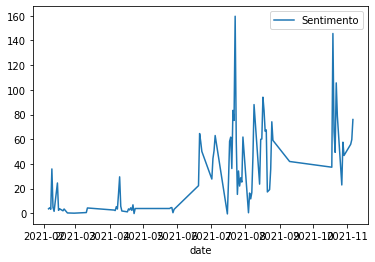

In [5]:
df.groupby(df['date'])['Sentimento'].sum().plot(legend=True)

In [6]:
category = ['Negativo','Neutro','Positivo']
df['DSent'] = pd.cut(df['Sentimento'], bins=[-1,-0.05,0.05,1], labels=category)
df

,Unnamed: 0,date,text,cleantext,Sentimento,DSent
0,0,2021-02-10,Blue Ridge Bank shares halted by NYSE after #b...,"['blue', 'ridge', 'bank', 'shares', 'halted', ...",0.00,Neutro
1,1,2021-02-10,"😎 Today, that's this #Thursday, we will do a ""...","['today', 'take', 'friend', 'expe']",0.00,Neutro
2,2,2021-02-10,"Guys evening, I have read this article about B...","['guys', 'evening', 'read', 'article', 'btc', ...",0.00,Neutro
3,3,2021-02-10,$BTC A big chance in a billion! Price: \487264...,"['btc', 'big', 'chance', 'billion', 'price']",0.00,Neutro
4,4,2021-02-10,This network is secured by 9 508 nodes as of t...,"['network', 'secured', 'nodes', 'today', 'soon...",0.00,Neutro
...,...,...,...,...,...,...
1715764,1905880,2021-11-05,@shibarium_ BTC is the cutest thing in the wor...,"['btc', 'cutest', 'thing', 'world', 'many', 'c...",0.00,Neutro
1715765,1905881,2021-11-05,@TechDev_52 @JohalMiles Will give him a follow...,"['give', 'follow']",0.00,Neutro
1715766,1905882,2021-11-05,@CryptoSagaing I have been buying cryptocurren...,"['buying', 'cryptocurrencies', 'since', 'last'...",0.00,Neutro
1715767,1905883,2021-11-05,NGL wouldn’t mind another little quick dip dow...,"['ngl', 'mind', 'another', 'little', 'quick', ...",0.00,Neutro


In [7]:
df1 = pd.get_dummies(df,columns=['DSent'])
df1

,Unnamed: 0,date,text,cleantext,Sentimento,DSent_Negativo,DSent_Neutro,DSent_Positivo
0,0,2021-02-10,Blue Ridge Bank shares halted by NYSE after #b...,"['blue', 'ridge', 'bank', 'shares', 'halted', ...",0.00,0,1,0
1,1,2021-02-10,"😎 Today, that's this #Thursday, we will do a ""...","['today', 'take', 'friend', 'expe']",0.00,0,1,0
2,2,2021-02-10,"Guys evening, I have read this article about B...","['guys', 'evening', 'read', 'article', 'btc', ...",0.00,0,1,0
3,3,2021-02-10,$BTC A big chance in a billion! Price: \487264...,"['btc', 'big', 'chance', 'billion', 'price']",0.00,0,1,0
4,4,2021-02-10,This network is secured by 9 508 nodes as of t...,"['network', 'secured', 'nodes', 'today', 'soon...",0.00,0,1,0
...,...,...,...,...,...,...,...,...
1715764,1905880,2021-11-05,@shibarium_ BTC is the cutest thing in the wor...,"['btc', 'cutest', 'thing', 'world', 'many', 'c...",0.00,0,1,0
1715765,1905881,2021-11-05,@TechDev_52 @JohalMiles Will give him a follow...,"['give', 'follow']",0.00,0,1,0
1715766,1905882,2021-11-05,@CryptoSagaing I have been buying cryptocurren...,"['buying', 'cryptocurrencies', 'since', 'last'...",0.00,0,1,0
1715767,1905883,2021-11-05,NGL wouldn’t mind another little quick dip dow...,"['ngl', 'mind', 'another', 'little', 'quick', ...",0.00,0,1,0


<AxesSubplot:xlabel='date'>

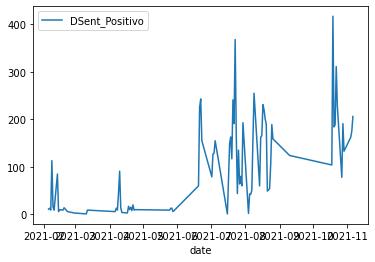

In [8]:
# df[('Positivo',)]
df1.groupby(df1['date'])['DSent_Positivo'].sum().plot(legend=True)

In [9]:
datapositivo = df1.groupby(pd.DatetimeIndex(df1['date'])).sum()
datapositivo.reset_index(inplace = True)
datapositivo

,date,Unnamed: 0,Sentimento,DSent_Negativo,DSent_Neutro,DSent_Positivo
0,2021-02-05,35027685,3.65,2.00,"1,681.00",11.00
1,2021-02-06,59631737,4.48,2.00,"3,263.00",13.00
2,2021-02-07,45563625,3.29,0.00,"3,021.00",9.00
3,2021-02-08,60417253,35.96,3.00,"5,531.00",113.00
4,2021-02-09,24797175,4.87,6.00,"4,328.00",16.00
...,...,...,...,...,...,...
85,2021-10-28,97233097740,57.62,59.00,"55,575.00",191.00
86,2021-10-29,56264321546,46.84,31.00,"35,643.00",133.00
87,2021-11-04,49380328001,55.90,27.00,"26,132.00",162.00
88,2021-11-05,69761345728,59.75,30.00,"37,547.00",175.00


In [10]:
maxpoints = datapositivo[ (datapositivo['DSent_Positivo'] >= 50) ]
maxpoints['date'] = pd.to_datetime(maxpoints['date']).dt.date
# minmaxpoints['date'] = pd.to_datetime(minmaxpoints['date'], format='%y-%m-%d')
maxpoints

,date,Unnamed: 0,Sentimento,DSent_Negativo,DSent_Neutro,DSent_Positivo
3,2021-02-08,60417253,35.96,3.00,"5,531.00",113.00
6,2021-02-13,71582195,24.58,2.00,"2,198.00",85.00
20,2021-04-10,218812083,29.56,3.00,"3,917.00",91.00
36,2021-06-20,2215124418,22.40,10.00,"8,798.00",60.00
37,2021-06-21,9367743210,64.62,81.00,"41,423.00",225.00
38,2021-06-22,8283517330,57.98,99.00,"45,498.00",243.00
39,2021-06-23,4201282627,50.15,51.00,"29,152.00",155.00
40,2021-07-02,6005833235,27.77,21.00,"17,689.00",79.00
41,2021-07-03,8036019865,44.34,30.00,"25,273.00",127.00
42,2021-07-04,6735562989,50.74,18.00,"22,940.00",129.00


In [11]:
maxpoints['date'] = maxpoints['date'].astype(str)
maxpointsList = list(maxpoints['date'])#ERROR: Command errored out with exit status 1:
maxpointsList

['2021-02-08',
 '2021-02-13',
 '2021-04-10',
 '2021-06-20',
 '2021-06-21',
 '2021-06-22',
 '2021-06-23',
 '2021-07-02',
 '2021-07-03',
 '2021-07-04',
 '2021-07-05',
 '2021-07-17',
 '2021-07-18',
 '2021-07-19',
 '2021-07-20',
 '2021-07-21',
 '2021-07-22',
 '2021-07-23',
 '2021-07-24',
 '2021-07-26',
 '2021-07-27',
 '2021-07-28',
 '2021-07-29',
 '2021-07-30',
 '2021-08-07',
 '2021-08-08',
 '2021-08-09',
 '2021-08-14',
 '2021-08-15',
 '2021-08-16',
 '2021-08-17',
 '2021-08-18',
 '2021-08-19',
 '2021-08-20',
 '2021-08-23',
 '2021-08-24',
 '2021-08-25',
 '2021-08-26',
 '2021-09-10',
 '2021-10-18',
 '2021-10-19',
 '2021-10-20',
 '2021-10-21',
 '2021-10-22',
 '2021-10-23',
 '2021-10-27',
 '2021-10-28',
 '2021-10-29',
 '2021-11-04',
 '2021-11-05',
 '2021-11-06']

In [29]:
# btcPrice = pd.read_csv('/home/ravi/Códigos/Criptocoin-tweet/cryptcoin-tweet/Data/BTC-USD_otc272020_oct272021.csv')
btcPrice = pd.read_csv('BTC-USD.csv')
# btcPrice[btcPrice['Date'] == '2021-02-08']
btcPrice

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-11,"38,346.53","38,346.53","30,549.60","35,566.66","35,566.66",123320567399
1,2021-01-12,"35,516.36","36,568.53","32,697.98","33,922.96","33,922.96",74773277909
2,2021-01-13,"33,915.12","37,599.96","32,584.67","37,316.36","37,316.36",69364315979
3,2021-01-14,"37,325.11","39,966.41","36,868.56","39,187.33","39,187.33",63615990033
4,2021-01-15,"39,156.71","39,577.71","34,659.59","36,825.37","36,825.37",67760757881
...,...,...,...,...,...,...,...
300,2021-11-07,"61,554.92","63,326.99","61,432.49","63,326.99","63,326.99",24726754302
301,2021-11-08,"63,344.07","67,673.74","63,344.07","67,566.83","67,566.83",41125608330
302,2021-11-09,"67,549.73","68,530.34","66,382.06","66,971.83","66,971.83",42357991721
303,2021-11-10,"66,953.34","68,789.62","63,208.11","64,995.23","64,995.23",48730828378


In [30]:
# btcPrice.loc[btcPrice['Date'].isin([aa])]
zz = btcPrice.query('Date in @maxpointsList')
btcPrice.loc[zz.index,'Positivo'] = True
btcPrice['Positivo'] = btcPrice['Positivo'].replace(np.nan,False)
btcPrice

,Date,Open,High,Low,Close,Adj Close,Volume,Positivo
0,2021-01-11,"38,346.53","38,346.53","30,549.60","35,566.66","35,566.66",123320567399,False
1,2021-01-12,"35,516.36","36,568.53","32,697.98","33,922.96","33,922.96",74773277909,False
2,2021-01-13,"33,915.12","37,599.96","32,584.67","37,316.36","37,316.36",69364315979,False
3,2021-01-14,"37,325.11","39,966.41","36,868.56","39,187.33","39,187.33",63615990033,False
4,2021-01-15,"39,156.71","39,577.71","34,659.59","36,825.37","36,825.37",67760757881,False
...,...,...,...,...,...,...,...,...
300,2021-11-07,"61,554.92","63,326.99","61,432.49","63,326.99","63,326.99",24726754302,False
301,2021-11-08,"63,344.07","67,673.74","63,344.07","67,566.83","67,566.83",41125608330,False
302,2021-11-09,"67,549.73","68,530.34","66,382.06","66,971.83","66,971.83",42357991721,False
303,2021-11-10,"66,953.34","68,789.62","63,208.11","64,995.23","64,995.23",48730828378,False


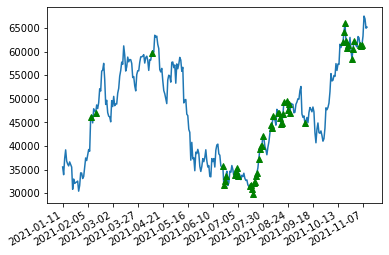

In [31]:
# btcPrice.plot(x='Date', y=['Close','teste'])

ts = btcPrice['Close'] 
ts2 = ts[btcPrice['Positivo']]
x = btcPrice['Date']

fig, ax1 = plt.subplots()
ax1.plot(btcPrice['Date'], ts) 
plt.xticks(x[::25])
ax1.plot(ts2.index, ts2,'g^')
fig.autofmt_xdate()
plt.savefig('Positivo.png')

<AxesSubplot:xlabel='date'>

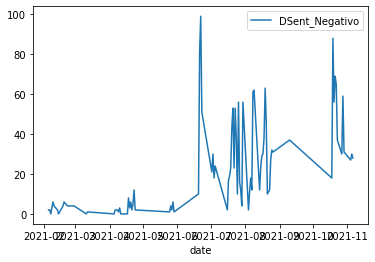

In [32]:
df1.groupby(df1['date'])['DSent_Negativo'].sum().plot(legend=True)

In [33]:
minpoints = datapositivo[ (datapositivo['DSent_Negativo'] >= 50) ]
minpoints['date'] = pd.to_datetime(minpoints['date']).dt.date
# minmaxpoints['date'] = pd.to_datetime(minmaxpoints['date'], format='%y-%m-%d')
minpoints

,date,Unnamed: 0,Sentimento,DSent_Negativo,DSent_Neutro,DSent_Positivo
37,2021-06-21,9367743210,64.62,81.00,"41,423.00",225.00
38,2021-06-22,8283517330,57.98,99.00,"45,498.00",243.00
39,2021-06-23,4201282627,50.15,51.00,"29,152.00",155.00
49,2021-07-21,17885663632,83.39,53.00,"38,617.00",241.00
51,2021-07-23,18452617339,159.63,53.00,"43,114.00",368.00
54,2021-07-26,19104814773,34.31,56.00,"27,300.00",135.00
58,2021-07-30,23558927671,61.80,56.00,"38,143.00",193.00
63,2021-08-08,26338453051,45.82,61.00,"33,615.00",158.00
64,2021-08-09,40382954234,88.08,62.00,"53,184.00",255.00
70,2021-08-19,32146527126,66.48,63.00,"34,008.00",201.00


In [34]:
minpoints['date'] = minpoints['date'].astype(str)
minpointsList = list(minpoints['date'])
minpointsList

['2021-06-21',
 '2021-06-22',
 '2021-06-23',
 '2021-07-21',
 '2021-07-23',
 '2021-07-26',
 '2021-07-30',
 '2021-08-08',
 '2021-08-09',
 '2021-08-19',
 '2021-10-19',
 '2021-10-20',
 '2021-10-21',
 '2021-10-22',
 '2021-10-28']

In [35]:
# btcPrice.loc[btcPrice['Date'].isin([aa])]
bticMin = btcPrice.query('Date in @minpointsList')
btcPrice.loc[bticMin.index,'Negativo'] = True
btcPrice['Negativo'] = btcPrice['Negativo'].replace(np.nan,False)
btcPrice[btcPrice['Negativo'] == True]

,Date,Open,High,Low,Close,Adj Close,Volume,Positivo,Negativo
161,2021-06-21,"35,641.14","35,721.64","31,295.94","31,676.69","31,676.69",52809038594,True,True
162,2021-06-22,"31,622.38","33,292.45","28,893.62","32,505.66","32,505.66",58964353058,True,True
163,2021-06-23,"32,515.71","34,753.41","31,772.63","33,723.03","33,723.03",46317108925,True,True
191,2021-07-21,"29,796.29","32,752.33","29,526.18","32,110.69","32,110.69",28203024559,True,True
193,2021-07-23,"32,305.96","33,581.55","32,057.89","33,581.55","33,581.55",22552046192,True,True
196,2021-07-26,"35,384.03","40,499.68","35,287.31","37,337.54","37,337.54",51022126212,True,True
200,2021-07-30,"40,027.48","42,235.55","38,397.36","42,235.55","42,235.55",33072782960,True,True
209,2021-08-08,"44,574.44","45,282.35","43,331.91","43,798.12","43,798.12",36302664750,True,True
210,2021-08-09,"43,791.93","46,456.83","42,848.69","46,365.40","46,365.40",38734079049,True,True
220,2021-08-19,"44,741.88","46,970.76","43,998.32","46,717.58","46,717.58",37204312299,True,True


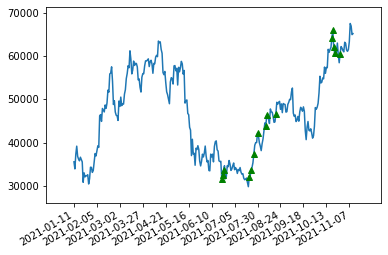

In [36]:
# btcPrice.plot(x='Date', y=['Close','teste'])

ts = btcPrice['Close'] 
ts2 = ts[btcPrice['Negativo']]
x = btcPrice['Date']

fig, ax1 = plt.subplots()
ax1.plot(x, ts)
plt.xticks(x[::25])
# plt.yticks(ts[::70])
plt.margins(0.1)
ax1.plot(ts2.index, ts2,'g^')
fig.autofmt_xdate()
plt.savefig('Negativo.png')

In [37]:
countTwitters=df.groupby(df['date']).size().reset_index(name='counts')
counts = list(countTwitters['date'].astype(str))
countTwitters

,date,counts
0,2021-02-05,1694
1,2021-02-06,3278
2,2021-02-07,3030
3,2021-02-08,5647
4,2021-02-09,4350
...,...,...
85,2021-10-28,55825
86,2021-10-29,35807
87,2021-11-04,26321
88,2021-11-05,37752


In [38]:
twcounts = btcPrice.query('Date in @counts')
twcounts

# countTwitters.index = list(twcounts.index)
# countTwitters['index'] = list(twcounts.index)
# btcPrice.loc[countTwitters.index,'Contagem'] = countTwitters.loc[countTwitters.index,'counts']

# btcPrice['Contagem'].plot(kind='bar')


,Date,Open,High,Low,Close,Adj Close,Volume,Positivo,Negativo
25,2021-02-05,"36,931.55","38,225.91","36,658.76","38,144.31","38,144.31",58598066402,False,False
26,2021-02-06,"38,138.39","40,846.55","38,138.39","39,266.01","39,266.01",71326033653,False,False
27,2021-02-07,"39,250.19","39,621.84","37,446.15","38,903.44","38,903.44",65500641143,False,False
28,2021-02-08,"38,886.83","46,203.93","38,076.32","46,196.46","46,196.46",101467222687,True,False
29,2021-02-09,"46,184.99","48,003.72","45,166.96","46,481.11","46,481.11",91809846886,False,False
...,...,...,...,...,...,...,...,...,...
290,2021-10-28,"58,470.73","62,128.63","58,206.92","60,622.14","60,622.14",45257083247,True,True
291,2021-10-29,"60,624.87","62,927.61","60,329.96","62,227.96","62,227.96",36856881767,True,False
297,2021-11-04,"62,941.80","63,123.29","60,799.66","61,452.23","61,452.23",32615846901,True,False
298,2021-11-05,"61,460.08","62,541.47","60,844.61","61,125.68","61,125.68",30605102446,True,False


In [40]:
twcounts = btcPrice.query('Date in @counts')
countTwitters.index = list(twcounts.index)
btcPrice.loc[countTwitters.index,'Contagem'] = countTwitters.loc[countTwitters.index,'counts']

# btcPrice['Contagem'].plot(kind='bar')


<AxesSubplot:>

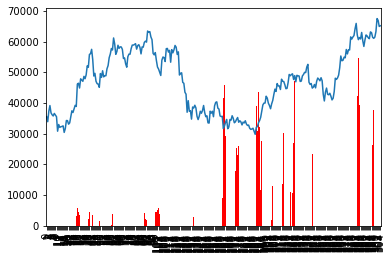

In [42]:
# btcPrice.plot(x='Date', y=['Close','teste'])

ts = btcPrice['Close'] 
ts2 = btcPrice['Contagem']
x = btcPrice['Date']

ax = ts.plot()
ts2.plot.bar(ax=ax,color='red')
# ax.xticks(x[::25])

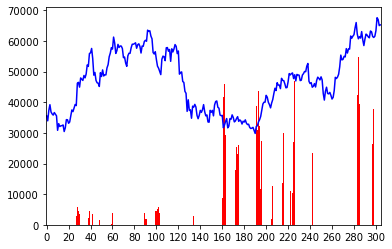

In [43]:
ts = btcPrice['Close'] 
ts2 = btcPrice['Contagem']
x = btcPrice['Date']

fig, ax = plt.subplots()


btcPrice['Contagem'].plot(kind='bar', color='red')
btcPrice['Close'].plot(kind='line', color='blue')
# plt.locator_params(axis="x", nbins=20)
# ax.yaxis.set_major_locator(plt.MaxNLocator(3))
ax.set_xticks(ax.get_xticks()[::20])

plt.show()